# IMDB Movie Review Sentiment Classification
This Colab notebook implements a binary classification model using a deep neural network on the IMDB movie reviews dataset.

In [ ]:
# 1. Mount Google Drive (optional)
from google.colab import drive
# drive.mount('/content/drive')

## 2. Install and Import Dependencies

In [ ]:
!pip install tensorflow scikit-learn matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

## 3. Load and Preprocess Data

In [2]:
# Load data (top 10000 most frequent words)
vocab_size = 10000
maxlen = 256
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to uniform length
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000, Test samples: 25000


## 4. Build the DNN Model

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# 4. Build the DNN Model (with explicit input_shape on the Embedding layer)
model = Sequential([
    Embedding(
        input_dim=vocab_size,    # size of the vocabulary
        output_dim=16,           # embedding dimensions
        input_length=maxlen,     # length of each padded review
        input_shape=(maxlen,)    # <– ensures layer is built immediately
    ),
    GlobalAveragePooling1D(),
    Dense(32 , activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Now the model is built and summary() will show all parameter counts
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 256, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,089 (629.25 KB)

 Trainable params: 161,089 (629.25 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the Model

In [7]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=512,
    verbose=1
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5424 - loss: 0.6921 - val_accuracy: 0.6898 - val_loss: 0.6824
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7035 - loss: 0.6739 - val_accuracy: 0.7386 - val_loss: 0.6293
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7575 - loss: 0.6022 - val_accuracy: 0.8184 - val_loss: 0.5122
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8277 - loss: 0.4751 - val_accuracy: 0.8050 - val_loss: 0.4344
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8403 - loss: 0.3898 - val_accuracy: 0.8456 - val_loss: 0.3692
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8707 - loss: 0.3303 - val_accuracy: 0.8344 - val_loss: 0.3656
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8637 - loss: 0.3181 - val_accuracy: 0.8670 - val_loss: 0.3233
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8939 - loss: 0.2729 - val_accuracy: 0.8726 - v

## 6. Evaluate and Visualize

782/782 - 2s - 2ms/step - accuracy: 0.8478 - loss: 0.3808
Test Accuracy: 0.848


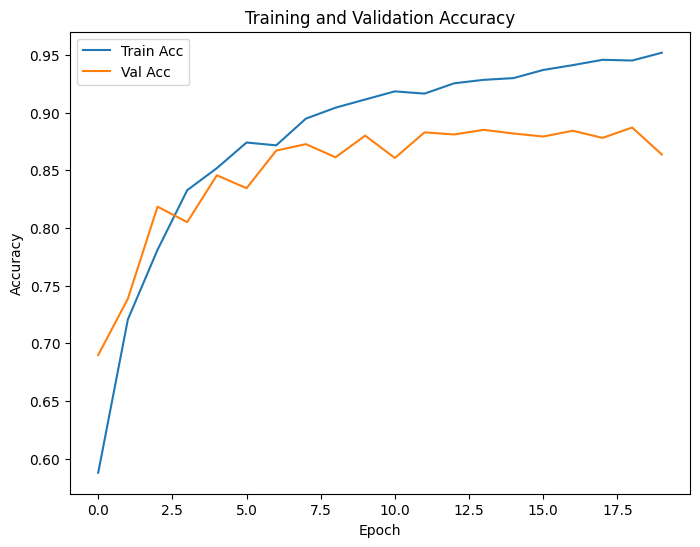

In [8]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.3f}")

# Plot training & validation accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()